In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from pprint import pprint
from config import openWeatherKey
import gmaps
import gmaps.datasets
import numpy as np
from THconfig import g_key
gmaps.configure(api_key=g_key)

In [6]:
disasterdataCSV = "Resources/disaster_data.csv"
Data_disaster_df = pd.read_csv(disasterdataCSV)
Data_disaster_df

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,2000-0420-CAN,2000,420,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,14.0,11.0,140.0,NaN,700.0,840.0,NaN,10000.0,13000.0,67.355759
1,2001-0052-CAN,2001,52,Natural,Meteorological,Storm,NaN,NaN,NaN,Kill,...,10.0,11.0,NaN,NaN,30.0,30.0,NaN,NaN,NaN,69.259340
2,2000-0080-USA,2000,80,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,22.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,NaN,67.355759
3,2000-0500-USA,2000,500,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Affect,...,14.0,NaN,NaN,175.0,NaN,175.0,NaN,NaN,166000.0,67.355759
4,2000-0919-USA,2000,919,Natural,Meteorological,Storm,NaN,NaN,NaN,SigDam,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2019-0307-USA,2019,307,Natural,Hydrological,Flood,NaN,NaN,NaN,Affected,...,9.0,3.0,NaN,600.0,NaN,600.0,NaN,NaN,NaN,100.000000
533,2020-0148-USA,2020,148,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Kill,...,14.0,38.0,200.0,NaN,NaN,200.0,NaN,NaN,1000000.0,NaN
534,2020-0011-USA,2020,11,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Kill,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
535,2020-0082-USA,2020,82,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,Waiting,...,5.0,25.0,300.0,12000.0,NaN,12300.0,NaN,NaN,1100000.0,NaN


In [7]:
weatherDisasterSouth_EastCSV = "output_data/NEW_coordinates.csv"
wDisaster_df = pd.read_csv(weatherDisasterSouth_EastCSV)
wDisaster_df

,Unnamed: 0,Unnamed: 0.1,Location,Dis No,Lat,Long
0,0,0,Kentucky,2000-0080-USA,34.61,-92.66
1,1,2,Morris,2000-0500-USA,40.83,-74.53
2,2,4,Alabama,2000-0919-USA,32.75,-86.75
3,3,5,Georgia,2000-0919-USA,32.75,-83.50
4,4,6,Louisiana,2000-0919-USA,31.00,-92.00
...,...,...,...,...,...,...
2856,2856,4016,Kentucky,2020-0082-USA,34.61,-92.66
2857,2857,4017,Missouri,2020-0082-USA,38.25,-92.50
2858,2858,4018,Mississippi,2020-0082-USA,32.75,-89.75
2859,2859,4019,Georgia,2020-0082-USA,32.75,-83.50


In [8]:
Full_Data_list_df = pd.merge(wDisaster_df, Data_disaster_df, on="Dis No", how="left")
# Full_Data_list_df

In [9]:
SE_wDisaster_df = wDisaster_df.loc[(wDisaster_df["Long"]>-90) & (wDisaster_df["Lat"]<38),["Location","Dis No","Lat", "Long"]]
SE_wDisaster_df

,Location,Dis No,Lat,Long
2,Alabama,2000-0919-USA,32.75,-86.75
3,Georgia,2000-0919-USA,32.75,-83.50
5,North Carolina,2000-0919-USA,35.50,-80.00
6,South Carolina,2000-0919-USA,34.00,-81.00
7,Tennessee,2000-0919-USA,35.75,-86.25
...,...,...,...,...
2852,Mississippi,2020-0011-USA,32.75,-89.75
2853,Alabama,2020-0011-USA,32.75,-86.75
2854,Tennessee,2020-0011-USA,35.75,-86.25
2858,Mississippi,2020-0082-USA,32.75,-89.75


In [10]:
len(SE_wDisaster_df["Location"].unique())

98

In [11]:
SE_Data_list_df = pd.merge(SE_wDisaster_df, Data_disaster_df, on="Dis No", how="left").rename(columns={"Location_x": "Location"})
SE_Data_list_df

,Location,Dis No,Lat,Long,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Alabama,2000-0919-USA,32.75,-86.75,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
1,Georgia,2000-0919-USA,32.75,-83.50,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
2,North Carolina,2000-0919-USA,35.50,-80.00,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
3,South Carolina,2000-0919-USA,34.00,-81.00,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
4,Tennessee,2000-0919-USA,35.75,-86.25,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Mississippi,2020-0011-USA,32.75,-89.75,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
575,Alabama,2020-0011-USA,32.75,-86.75,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
576,Tennessee,2020-0011-USA,35.75,-86.25,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
577,Mississippi,2020-0082-USA,32.75,-89.75,2020,82,Natural,Meteorological,Storm,Convective storm,...,5.0,25.0,300.0,12000.0,NaN,12300.0,NaN,NaN,1100000.0,NaN


In [12]:
SE_Data_list_df["Disaster Type"].unique()

array(['Storm', 'Wildfire', 'Drought', 'Flood', 'Epidemic',
       'Extreme temperature'], dtype=object)

In [18]:
# SE_Data_list_df.groupby(["Disaster Type", "Disaster Subtype"]).count()

In [14]:
trimmed_df = SE_Data_list_df.drop_duplicates(subset= "Dis No", keep="first")
trimmed_df

,Location,Dis No,Lat,Long,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Alabama,2000-0919-USA,32.75,-86.75,2000,919,Natural,Meteorological,Storm,NaN,...,25.0,4.0,NaN,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
6,Bullock,2000-0067-USA,32.07,-85.70,2000,67,Natural,Meteorological,Storm,Convective storm,...,14.0,22.0,100.0,900.0,NaN,1000.0,NaN,NaN,NaN,67.355759
8,Columbia,2000-0338-USA,34.00,-81.03,2000,338,Natural,Meteorological,Storm,Convective storm,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,67.355759
9,Anderson,2000-0360-USA,34.53,-82.65,2000,360,Natural,Meteorological,Storm,Convective storm,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.355759
14,Florida,2000-0937-USA,28.75,-82.50,2000,937,Natural,Meteorological,Storm,Convective storm,...,17.0,12.0,75.0,NaN,NaN,75.0,NaN,200500.0,500000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,Mississippi,2019-0335-USA,32.75,-89.75,2019,335,Natural,Meteorological,Storm,Tropical cyclone,...,15.0,1.0,NaN,NaN,NaN,NaN,NaN,300000.0,600000.0,100.000000
563,Florida,2019-0412-USA,28.75,-82.50,2019,412,Natural,Meteorological,Storm,Tropical cyclone,...,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,100.000000
568,Mississippi,2020-0148-USA,32.75,-89.75,2020,148,Natural,Meteorological,Storm,Convective storm,...,14.0,38.0,200.0,NaN,NaN,200.0,NaN,NaN,1000000.0,NaN
574,Mississippi,2020-0011-USA,32.75,-89.75,2020,11,Natural,Meteorological,Storm,Convective storm,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN


In [176]:
Disastercount_df = trimmed_df.groupby(["Disaster Subtype"]).agg({"Location":"count","Insured Damages ('000 US$)":"sum", "Total Damages ('000 US$)":"sum"})
# Disastercount_df = trimmed_df.groupby(["Disaster Subtype"]).sum(["Location"])
Disastercount_df = Disastercount_df.reset_index(drop=False)
Disastercount_df

,Disaster Subtype,Location,Insured Damages ('000 US$),Total Damages ('000 US$)
0,Cold wave,1,1600000.0,2500000.0
1,Convective storm,92,65337500.0,109587400.0
2,Drought,2,0.0,1400000.0
3,Flash flood,1,1500000.0,2700000.0
4,Forest fire,6,150000.0,2000000.0
5,Heat wave,1,0.0,0.0
6,"Land fire (Brush, Bush, Pasture)",2,10050000.0,13400000.0
7,Riverine flood,17,1101000.0,7633000.0
8,Severe winter conditions,1,0.0,200000.0
9,Tropical cyclone,33,191014500.0,477895360.0


([<matplotlib.axis.XTick at 0x7fb361d79d90>,
 [Text(0, 0, 'Cold wave'),
  Text(1, 0, 'Convective storm'),
  Text(2, 0, 'Drought'),
  Text(3, 0, 'Flash flood'),
  Text(4, 0, 'Forest fire'),
  Text(5, 0, 'Heat wave'),
  Text(6, 0, 'Land fire (Brush, Bush, Pasture)'),
  Text(7, 0, 'Riverine flood'),
  Text(8, 0, 'Severe winter conditions'),
  Text(9, 0, 'Tropical cyclone'),
  Text(10, 0, 'Viral disease')])

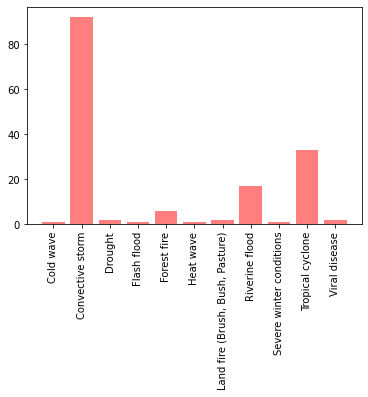

In [194]:
#Counts of Disasters
tick_locations = [value for value in xaxis]
yaxis = Disastercount_df["Location"]
xaxis = np.arange(len(Disastercount_df))
plt.bar(xaxis, yaxis, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, Disastercount_df["Disaster Subtype"], rotation= "vertical")
# yaxis


In [157]:
#Total covered by Insuance
insurance_coverage = trimmed_df.groupby("Year").sum()
keycolumns = ["Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
insurance_coverage = insurance_coverage.loc[:,keycolumns].reset_index(drop=False)
insurance_coverage



,Year,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$)
0,2000,52.0,175.0,2500.0,0.0,2675.0,480500.0,2978500.0
1,2001,64.0,148.0,103665.0,70030.0,173843.0,3700500.0,6273000.0
2,2002,357.0,266.0,21102.0,351.0,21719.0,3703000.0,4251000.0
3,2003,161.0,421.0,229695.0,15231.0,245347.0,6657000.0,15246400.0
4,2004,196.0,37.0,5038404.0,753.0,5039194.0,26112500.0,47222500.0
5,2005,1838.0,0.0,500000.0,0.0,500000.0,61115000.0,127230000.0
6,2006,84.0,226.0,71005.0,0.0,71231.0,2913500.0,3586860.0
7,2007,136.0,240.0,11600.0,768.0,12608.0,2566000.0,3530000.0
8,2008,249.0,327.0,2301550.0,0.0,2301877.0,20955000.0,41592000.0
9,2009,66.0,124.0,3750.0,900.0,4774.0,4000000.0,7540000.0


Text(0.5, 1.0, 'Total Damage Done Vs Total Insured')

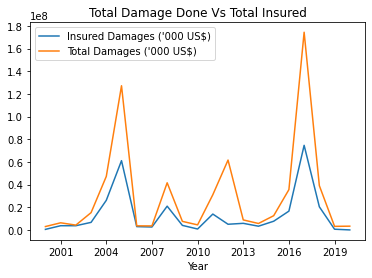

In [131]:
# Total Damanges and Insured Damanges
PlotThis = ["Insured Damages ('000 US$)","Total Damages ('000 US$)"]
df = insurance_coverage
lines = df.plot(kind="line",x="Year",y=PlotThis)
lines.xaxis.set_major_locator(plt.MaxNLocator(8))
lines.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.title("Total Damage Done Vs Total Insured")

In [34]:
locations = trimmed_df[["Lat", "Long"]]
ratings = trimmed_df["Total Damages ('000 US$)"].astype(float)
max_damages = max(trimmed_df["Total Damages ('000 US$)"])
print(max_damages)

125000000.0


In [94]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights = ratings, dissipating=False, max_intensity=1000000,
                                 point_radius=1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [89]:
trimmed_year_df = trimmed_df.groupby(["Year"]).agg({"Total Damages ('000 US$)":"max"})
trimmed_year_df = trimmed_year_df.dropna()
trimmed_year_df
maxdamage_latlong_df = pd.merge(trimmed_year_df,trimmed_df, on=["Year","Total Damages ('000 US$)"], how="left")
maxdamage_latlong_df = maxdamage_latlong_df[["Year","Total Damages ('000 US$)","Location","Dis No","Lat","Long"]]
maxdamage_latlong_df

,Year,Total Damages ('000 US$),Location,Dis No,Lat,Long
0,2000,1100000.0,South Carolina,2000-9339-USA,34.00,-81.00
1,2001,6000000.0,Mississippi,2001-0242-USA,32.75,-89.75
2,2002,2200000.0,Moultrie,2002-0310-USA,31.18,-83.79
3,2003,5000000.0,South Carolina,2003-0139-USA,34.00,-81.00
4,2004,18000000.0,Alabama,2004-0462-USA,32.75,-86.75
5,2005,125000000.0,Mobile,2005-0467-USA,30.78,-88.20
6,2006,1600000.0,Sumner,2006-0171-USA,36.50,-86.45
7,2007,2000000.0,Georgia,2007-0663-USA,32.75,-83.50
8,2008,30000000.0,Tennessee,2008-0384-USA,35.75,-86.25
9,2009,2500000.0,Tennessee,2009-0287-USA,35.75,-86.25


In [90]:
locations1 = maxdamage_latlong_df[["Lat", "Long"]]
ratings1 = maxdamage_latlong_df["Total Damages ('000 US$)"].astype(float)
max_damages1 = max(maxdamage_latlong_df["Total Damages ('000 US$)"])


In [103]:
# NOTE: Do not change any of the code in this cell

# Worst Storm Each year
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations1, weights = ratings1, dissipating=False, max_intensity=10000000,
                                 point_radius=1)

fig.add_layer(heat_layer)



fig

Figure(layout=FigureLayout(height='420px'))

In [114]:
# Using the template add the hotel marks to the heatmap
info_box_content = """<dt>Year</dt><dd>{Year}</dd>"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
year_info = [info_box_template.format(**row) for index, row in maxdamage_latlong_df.iterrows()]
locations1 = maxdamage_latlong_df[["Lat", "Long"]]


#Add marker to heat map
markers = gmaps.marker_layer(locations1,info_box_content=year_info)
fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))